/var/folders/23/n6gtq_514_z5qhrk2zh3kjl00000gn/T/ipykernel_63237/1557926604.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs1, data1 = wavfile.read("Amador.wav")
/var/folders/23/n6gtq_514_z5qhrk2zh3kjl00000gn/T/ipykernel_63237/1557926604.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs2, data2 = wavfile.read("Carmona.wav")


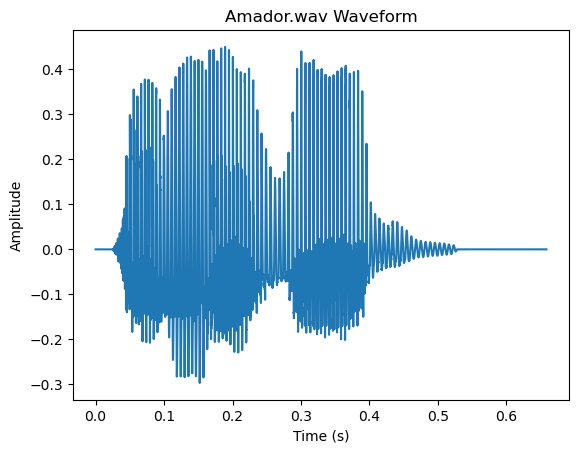

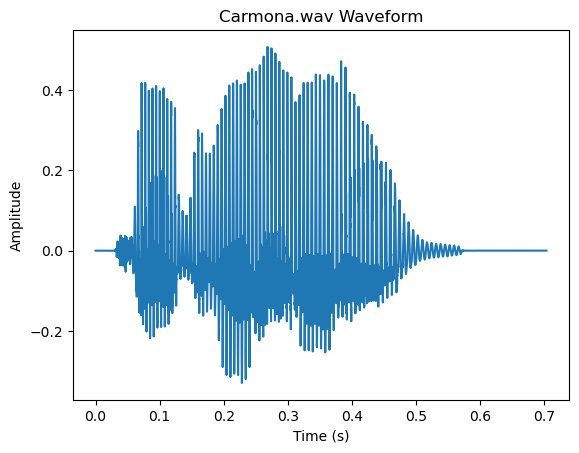

--- Amador.wav ---
Sample rate: 22050
Data shape: (14520,)
Duration (seconds): 0.6585034013605442
--- Carmona.wav ---
Sample rate: 22050
Data shape: (15510,)
Duration (seconds): 0.7034013605442176


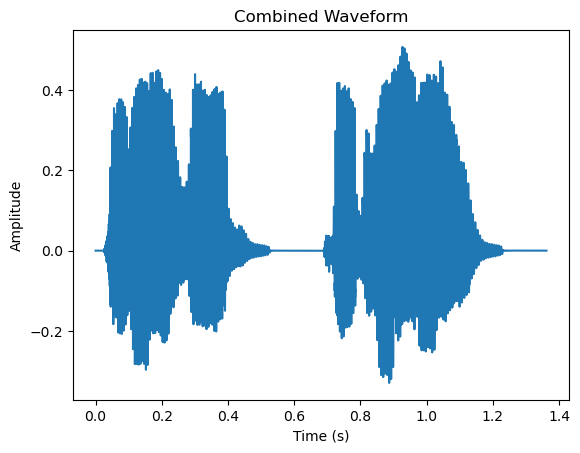

/var/folders/23/n6gtq_514_z5qhrk2zh3kjl00000gn/T/ipykernel_63237/1557926604.py:62: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs3, data3 = wavfile.read("AmadorCarmona.wav")


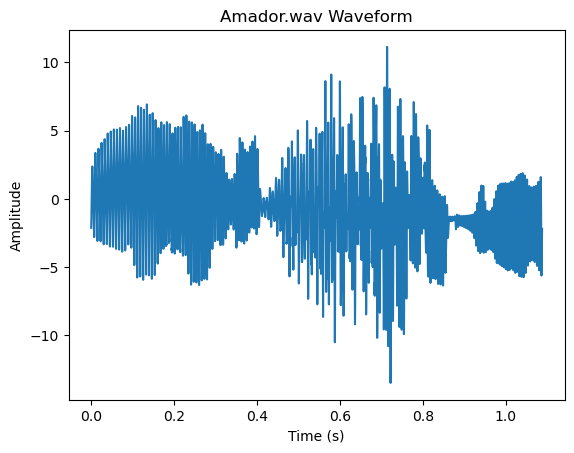

In [7]:
import wave
import numpy as np
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt

# 1. Leer dos ficheros de sonido (WAV o MP3)
fs1, data1 = wavfile.read("Amador.wav")
fs2, data2 = wavfile.read("Carmona.wav")

# 2. Dibujar la forma de onda de ambos sonidos
def plot_waveform(data, fs, title):
    duration = len(data) / fs
    time = np.linspace(0., duration, len(data))
    
    plt.figure()
    plt.plot(time, data)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

plot_waveform(data1, fs1, "Amador.wav Waveform")
plot_waveform(data2, fs2, "Carmona.wav Waveform")

# 3. Obtener la información de las cabeceras de ambos sonidos
def print_audio_info(data, fs, title):
    print(f"--- {title} ---")
    print("Sample rate:", fs)
    print("Data shape:", data.shape)
    print("Duration (seconds):", len(data) / fs)

print_audio_info(data1, fs1, "Amador.wav")
print_audio_info(data2, fs2, "Carmona.wav")

# 4. Unir ambos sonidos en uno nuevo
combined_data = np.concatenate((data1, data2))

# 5. Dibujar la forma de onda de la señal resultante
plot_waveform(combined_data, fs1, "Combined Waveform")

# 6. Pasarle un filtro de frecuencia para eliminar las frecuencias entre 10000Hz y 20000Hz
fs1 = 44100  # Frecuencia de muestreo del audio
lowcut = 10000.0
highcut = 20000.0
nyquist = 0.5 * fs1
low = lowcut / nyquist
high = highcut / nyquist

# Crear el filtro de Butterworth
N = 10  # Orden del filtro
Wn = [low, high]  # Frecuencias críticas normalizadas
b, a = signal.butter(N, Wn, btype='bandstop')

# Aplicar el filtro al audio
filtered_data = signal.lfilter(b, a, combined_data)

# 7. Almacenar la señal obtenida como un fichero WAV denominado "mezcla.wav"
wavfile.write("mezcla.wav", fs1, filtered_data)

# 8. Cargar un nuevo archivo de sonido, aplicarle eco y a continuación darle la vuelta al sonido.
fs3, data3 = wavfile.read("AmadorCarmona.wav")

reversed_data = np.flip(data3)
reversed_echo_data = np.convolve(reversed_data, np.ones(10000), mode='same')
plot_waveform(reversed_echo_data, fs3, "AmadorCarmonaAlReves.wav Waveform")
# Almacenar la señal obtenida como un fichero WAV denominado "alreves.wav"
wavfile.write("alreves.wav", fs3, reversed_data)
